In [176]:
# elastic net  vs lasso vs ridge


In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [178]:
df=pd.read_csv('ocean_health_index.csv',usecols=range(2,15))
df.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,70.79,70.10,70.09,70.52,71.28,72.14,77.65,80.87,79.94,79.39,76.43,64.90,67.50
1,63.33,64.57,64.57,67.00,67.66,66.70,65.71,61.90,59.76,59.23,59.41,57.91,57.89
2,72.17,70.60,70.82,70.86,70.74,70.21,70.36,70.30,70.36,70.35,70.44,70.63,70.87
3,62.95,63.27,63.86,66.55,66.16,66.70,67.38,67.52,71.79,71.70,71.19,65.38,69.68
4,74.66,74.98,74.97,74.92,77.45,77.45,77.44,77.44,76.61,76.51,76.33,76.35,76.34


In [179]:
df.shape

(194, 13)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2012    194 non-null    float64
 1   2013    194 non-null    float64
 2   2014    194 non-null    float64
 3   2015    194 non-null    float64
 4   2016    194 non-null    float64
 5   2017    194 non-null    float64
 6   2018    194 non-null    float64
 7   2019    194 non-null    float64
 8   2020    194 non-null    float64
 9   2021    194 non-null    float64
 10  2022    194 non-null    float64
 11  2023    194 non-null    float64
 12  2024    194 non-null    float64
dtypes: float64(13)
memory usage: 19.8 KB


In [181]:
df.isna().sum()

2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64

In [182]:
df.cov()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
2012,35.639088,34.194933,33.461158,32.494372,32.118621,32.095025,31.343653,30.278804,28.629042,28.167150,28.876931,30.318416,29.898490
2013,34.194933,35.240342,34.747096,34.033470,33.643133,33.373813,32.459975,31.441314,29.852540,29.292391,30.068455,31.025348,30.452605
2014,33.461158,34.747096,36.123192,35.477561,34.903985,34.400145,33.203770,32.396143,30.820337,30.087186,30.737990,31.469500,31.002975
2015,32.494372,34.033470,35.477561,36.228611,35.839653,35.305744,33.860559,32.775305,31.132787,30.510202,31.047023,31.405974,31.065689
2016,32.118621,33.643133,34.903985,35.839653,36.310702,36.234248,35.033510,33.923969,32.090670,31.410454,31.956984,31.752227,31.422772
2017,32.095025,33.373813,34.400145,35.305744,36.234248,38.116311,37.385424,36.323772,34.415648,33.382845,33.855349,33.039588,32.727157
2018,31.343653,32.459975,33.203770,33.860559,35.033510,37.385424,38.381417,37.603504,35.637649,34.441305,34.496334,32.829821,32.645225
2019,30.278804,31.441314,32.396143,32.775305,33.923969,36.323772,37.603504,38.136521,36.385014,35.287403,35.252617,33.003892,32.799596
2020,28.629042,29.852540,30.820337,31.132787,32.090670,34.415648,35.637649,36.385014,37.695838,37.131551,36.906887,34.364686,33.726632
2021,28.167150,29.292391,30.087186,30.510202,31.410454,33.382845,34.441305,35.287403,37.131551,37.952351,37.707030,34.976679,34.203330


<Axes: xlabel='2012', ylabel='2020'>

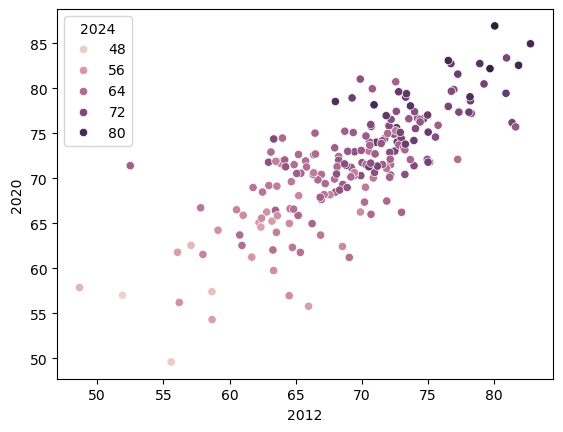

In [183]:
sns.scatterplot(data=df,x=df['2012'],y=df['2020'],hue=df['2024'])

In [184]:
x=df.iloc[:,0:12]
y=df.iloc[:,12:13]
x.shape,y.shape
    

((194, 12), (194, 1))

In [185]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.3)

C:\Users\STEVE\AppData\Local\Temp\ipykernel_10176\3094418654.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\STEVE\AppData\Local\Temp\ipykernel_10176\3094418654.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\STEVE\AppData\Local\Temp\ipykernel_10176\309441

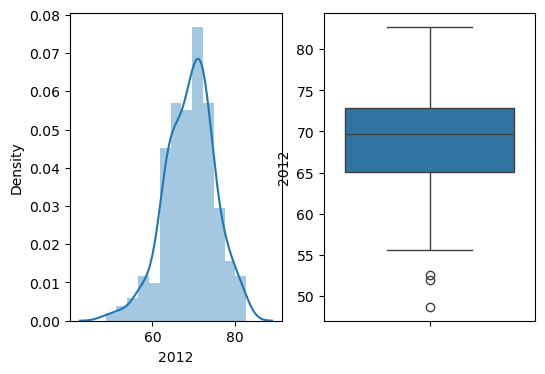

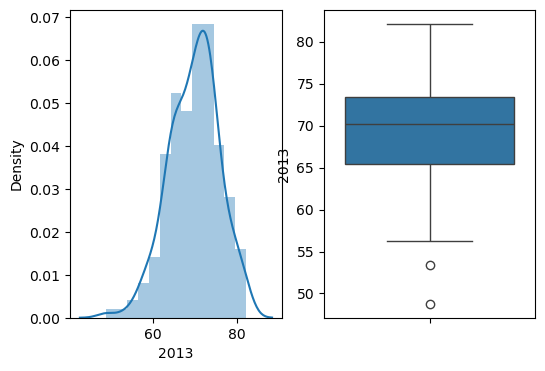

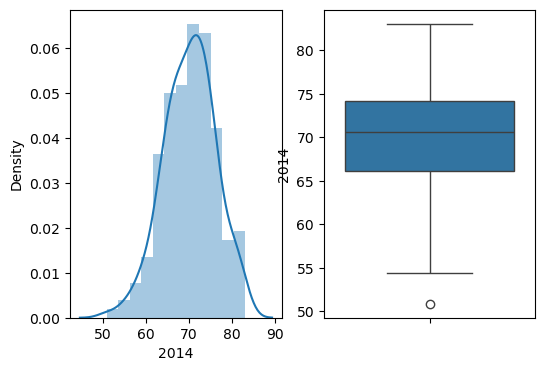

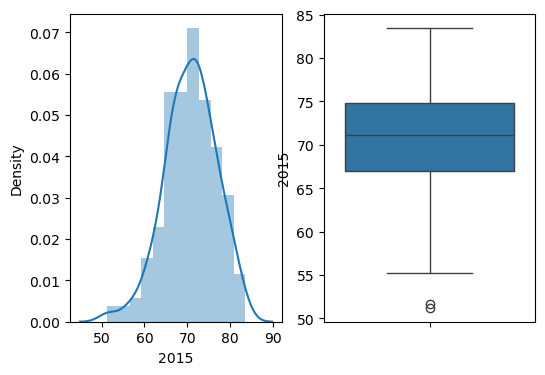

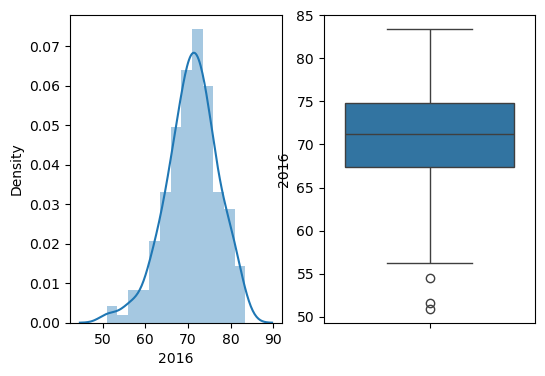

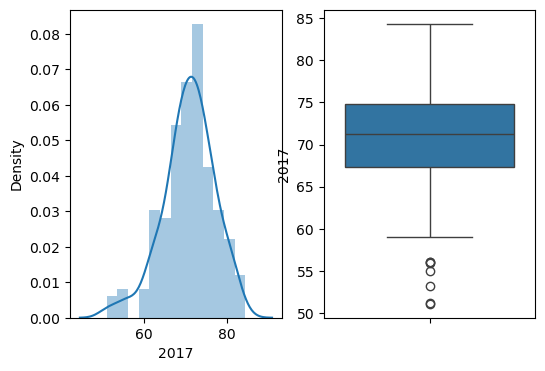

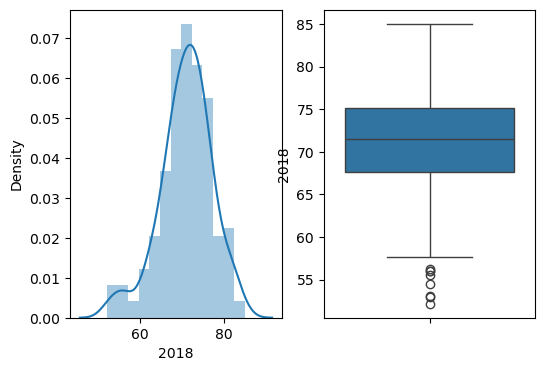

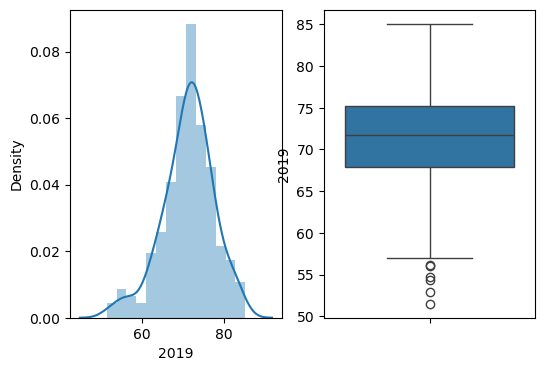

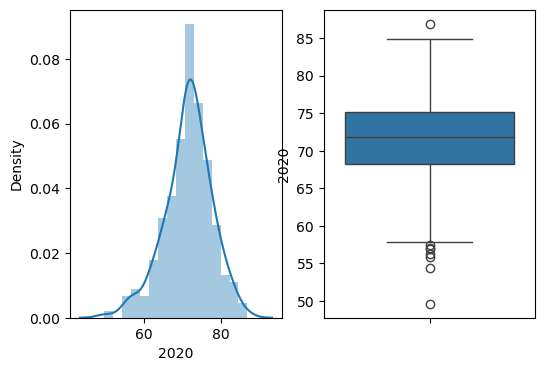

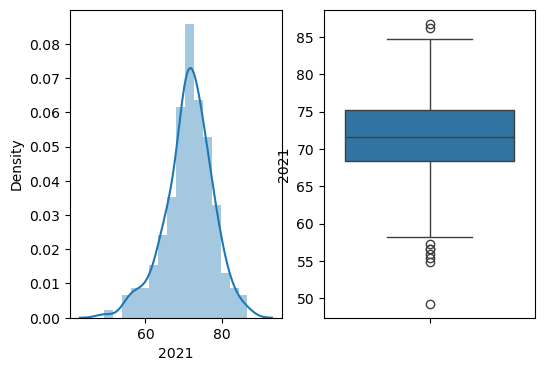

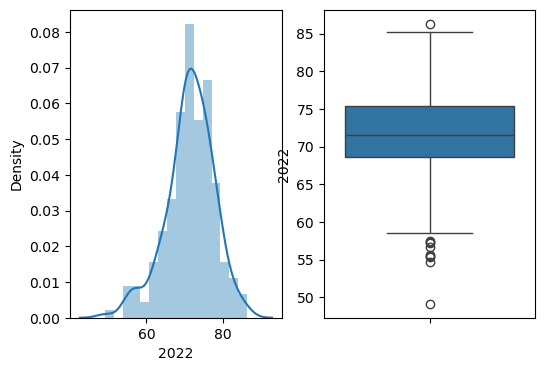

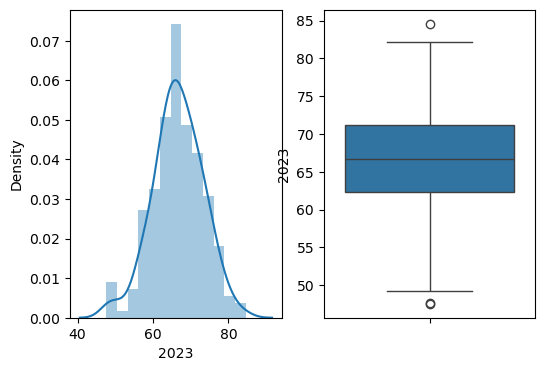

In [186]:

for i in X_train.columns:
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df[i])

In [187]:
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)


In [188]:
#using linear
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_predict=lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)

[[ 0.6799534  -3.57968309 -3.05036143  9.84577582 -4.39764148 -4.71910607
   0.8558898  11.01916879 -6.52519888 -3.01526876  0.88706573 35.16936023]]
[48.96978534]


In [189]:
print(r2_score(Y_test,y_predict))
print(mean_squared_error(Y_test,y_predict))
print(mean_absolute_error(Y_test,y_predict))


0.9462075787113755
1.7682060658672576
0.8550721670559208


In [190]:
# using ridge
r=Ridge(alpha=.01)
r.fit(X_train,Y_train)
y_predict1=r.predict(X_test)
print(r.coef_)
print(r.intercept_)

[ 0.65363127 -3.45502192 -1.97075512  7.60028677 -3.05226995 -4.18337621
  0.91540713  9.63609802 -5.63639769 -2.5339186   0.48049547 34.7503205 ]
[48.87869489]


In [191]:
print(r2_score(Y_test,y_predict1))
print(mean_squared_error(Y_test,y_predict1))
print(mean_absolute_error(Y_test,y_predict1))

0.9495724790722606
1.6575987147455853
0.8233420894350425


In [192]:
# lasso
ls=Lasso(alpha=.01)
ls.fit(X_train,Y_train)
y_predict2=ls.predict(X_test)
print(ls.coef_)
print(ls.intercept_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.31362437e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.21666386e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.24611173e+01]
[48.12141929]


In [193]:
print(r2_score(Y_test,y_predict2))
print(mean_squared_error(Y_test,y_predict2))
print(mean_absolute_error(Y_test,y_predict2))

0.962128803392826
1.2448608550851277
0.7383492196401866


In [194]:
#ELasticNET
en=ElasticNet(alpha=.01,l1_ratio=0.5)
en.fit(X_train,Y_train)
y_predict3=en.predict(X_test)
print(en.coef_)
print(en.intercept_)

[ 1.97497     0.50845589  0.7823826   0.96342791  0.          0.48499404
  0.3269945   0.93328883  0.9594451   1.75690866  3.04382395 21.7101565 ]
[47.52620802]


In [195]:
print(r2_score(Y_test,y_predict3))
print(mean_squared_error(Y_test,y_predict3))
print(mean_absolute_error(Y_test,y_predict3))

0.9386914395405943
2.0152684318159784
1.2256782520078833
